#Setting up Quandl, numpy, pandas and matplotlib
Note: quandl reduced the accessible Free data, which is why we I am using BTC-Daily data for this Chapter

In [203]:
import pandas
pandas.__version__

'2.2.3'

In [204]:
global QUANDL_API_KEY
file_path = os.path.join('/config', 'workspace', 'jamesma-pythonforfinance2nd', '.api')
with open(file_path, 'r') as file:
    QUANDL_API_KEY = file.read().strip()

# Now you can access the QUANDL_API_KEY variable globally
print("Successfully loaded API")

Successfully loaded API


In [205]:
#This section is for the Quandl API because it requires a Date string in the format 'YYYY-MM-DD' to pull data for a specific date range.
import datetime

# define range
start_date = datetime.date(2022, 1, 1)
end_date = datetime.date(2024, 12, 31)  # Gestern als Enddatum

# create comma seperated list of dates
date_list = []
current_date = start_date
while current_date <= end_date:
    date_list.append(current_date.strftime('%Y-%m-%d'))
    current_date += datetime.timedelta(days=1)

# create string
date_string = ','.join(date_list)

#Fetching data from Quandl and Plotting it with matplotlib

In [206]:
import nasdaqdatalink as ndl

ndl.ApiConfig.api_key = QUANDL_API_KEY
df = ndl.get_table('QDL/BITFINEX',date=date_string, code='BTCUSD') #Free dataset
df = df.set_index('date')
df.sort_index(inplace=True)

print(df.head())


              code          high      low      mid          last      bid  \
date                                                                        
2022-01-01  BTCUSD  47957.000000  46203.0  47581.5  47581.000000  47581.0   
2022-01-02  BTCUSD  48012.000000  46648.0  47374.5  47375.000000  47374.0   
2022-01-03  BTCUSD  47578.000000  45689.0  46485.5  46469.268882  46484.0   
2022-01-04  BTCUSD  47671.862805  45568.0  45889.5  45890.000000  45889.0   
2022-01-05  BTCUSD  47058.000000  42505.0  43617.5  43619.000000  43615.0   

                ask       volume  
date                              
2022-01-01  47582.0  2143.256583  
2022-01-02  47375.0  1840.013289  
2022-01-03  46487.0  2571.005612  
2022-01-04  45890.0  3780.933262  
2022-01-05  43620.0  6907.211520  


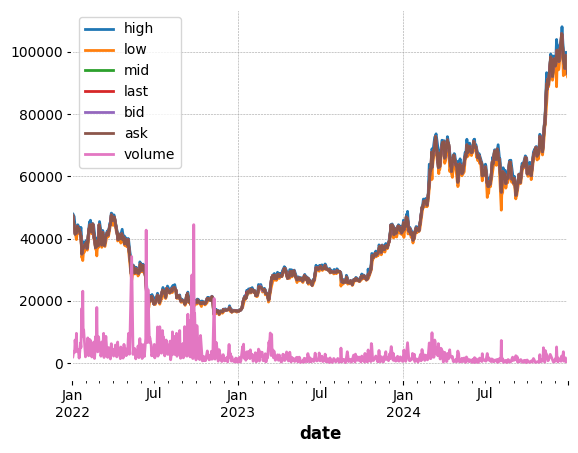

In [207]:
#%matplotlib inline    
import matplotlib.pyplot as plt    
df.plot();

#Plot the Mid-Price and the daily volume for BTC on BitFinex

In [208]:
prices = df['mid']  
volumes = df['volume']

print(prices.head())
print(volumes.head())

date
2022-01-01    47581.5
2022-01-02    47374.5
2022-01-03    46485.5
2022-01-04    45889.5
2022-01-05    43617.5
Name: mid, dtype: float64
date
2022-01-01    2143.256583
2022-01-02    1840.013289
2022-01-03    2571.005612
2022-01-04    3780.933262
2022-01-05    6907.211520
Name: volume, dtype: float64


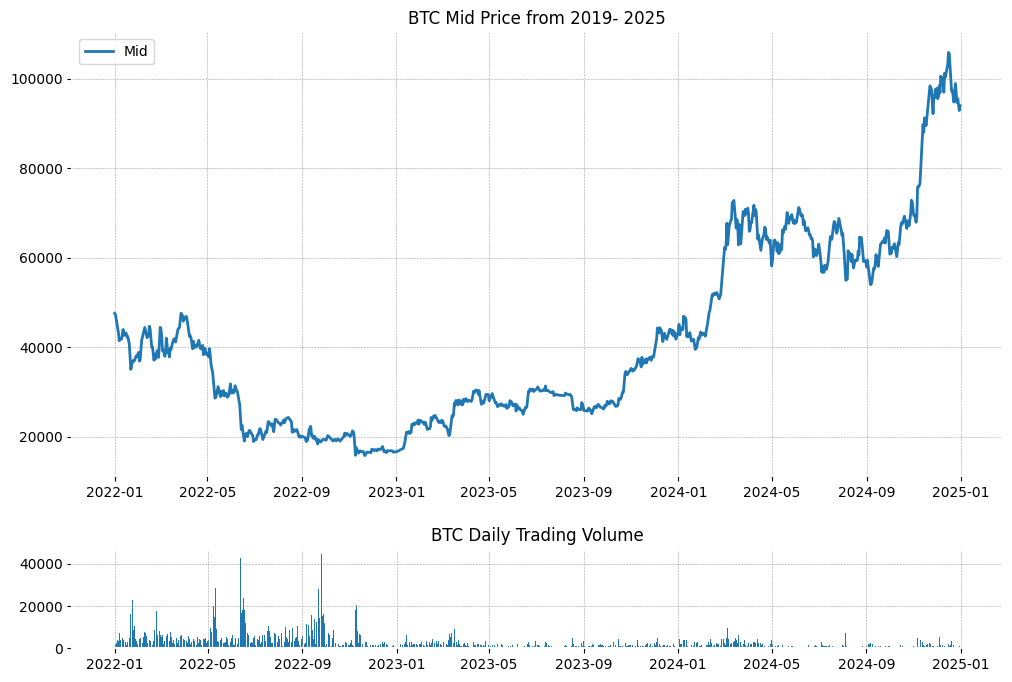

In [209]:
#The top plot consisting of daily closing prices    
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)    
top.plot(prices.index, prices, label='Mid')    
plt.title('BTC Mid Price from 2019- 2025')    
plt.legend(loc=2)    
# The bottom plot consisting of daily trading volume    
bottom = plt.subplot2grid((4, 4), (3,0), rowspan=1, colspan=4)    
bottom.bar(volumes.index, volumes)    
plt.title('BTC Daily Trading Volume')    
plt.gcf().set_size_inches(12, 8)    
plt.subplots_adjust(hspace=0.75)


#Plotting a candlestick chart


In [210]:
import nasdaqdatalink as ndl 
import mplfinance as mpf  
import pandas as pd
import matplotlib.dates as mdates    
import matplotlib.pyplot as plt 
df['Open'] = df['last'].shift(1)
df_subset=df.tail(30)

#

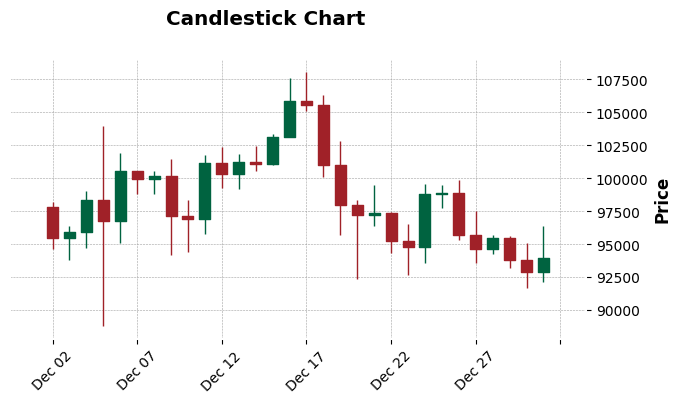

In [211]:
df_ohlc = df_subset[['Open', 'high', 'low', 'last']].copy()  # Kopie erstellen, um das Original nicht zu verändern
df_ohlc.rename(columns={'last': 'Close', 'high': 'High', 'low': 'Low'}, inplace=True)  

mpf.plot(df_ohlc, type='candle', volume=False, style='charles', figsize=(8, 4),
         title="Candlestick Chart", ylabel='Price')



#Visualizing statistical properties of time series

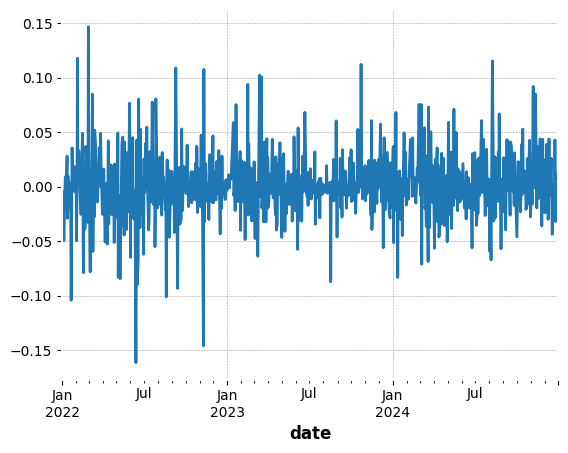

In [212]:
last_prices = df['last']
daily_changes = last_prices.pct_change(periods=1)
daily_changes.plot();

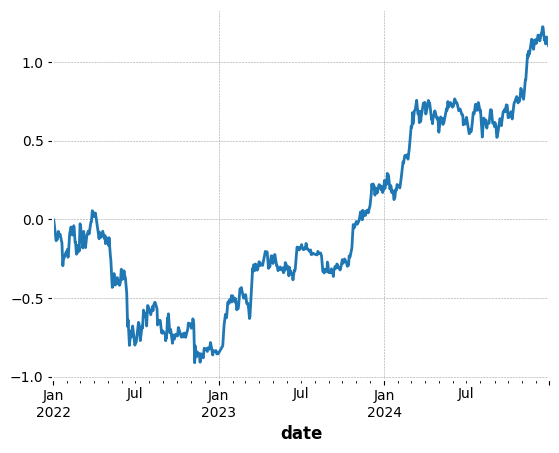

In [213]:
df_cumsum = daily_changes.cumsum()    
df_cumsum.plot();

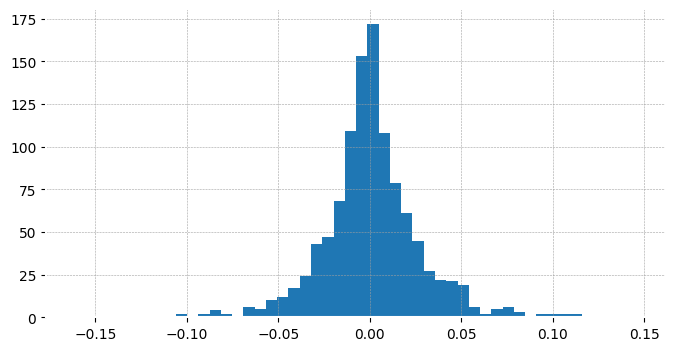

In [214]:
daily_changes.hist(bins=50, figsize=(8, 4));

In [215]:
daily_changes.describe()

count    1095.000000
mean        0.001012
std         0.027964
min        -0.161511
25%        -0.011527
50%        -0.000077
75%         0.013640
max         0.146618
Name: last, dtype: float64

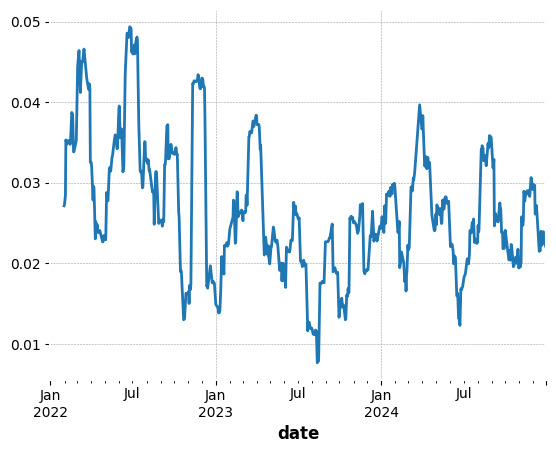

In [216]:
#Plotting Vola
df_filled = last_prices.asfreq('D', method='ffill')    
df_returns = df_filled.pct_change()    
df_std = df_returns.rolling(window=30, min_periods=30).std()    
df_std.plot();

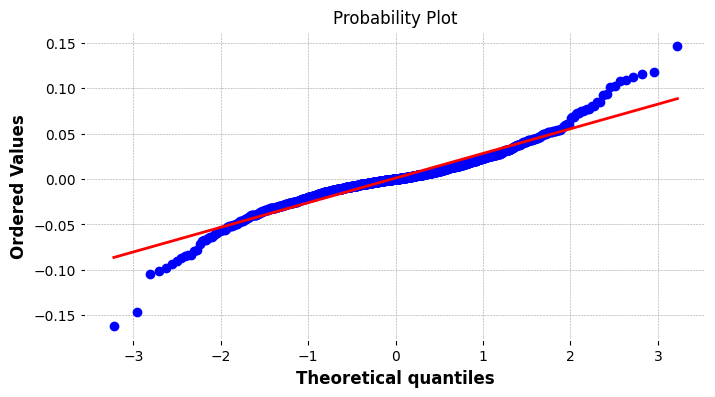

In [217]:
from scipy import stats    
from scipy.stats import probplot

daily_changes = last_prices.pct_change(periods=1).dropna()    

figure = plt.figure(figsize=(8,4))    
ax = figure.add_subplot(111)    
stats.probplot(daily_changes, dist='norm', plot=ax)    
plt.show();


<Axes: xlabel='date'>

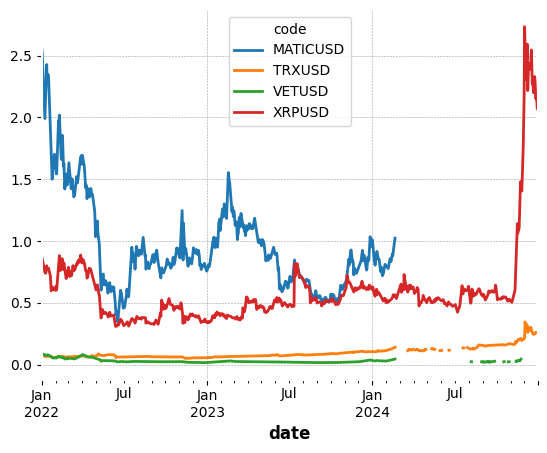

In [232]:
df_random_alts = ndl.get_table('QDL/BITFINEX',date=date_string, code='MATICUSD,XRPUSD,TRXUSD,VETUSD')  
df_random_alts.set_index('date',inplace=True)
df_random_alts.sort_index(inplace=True)
pivoted_df = df_random_alts.pivot(columns='code', values='last')

# Display the plot
pivoted_df.plot()

In [238]:
pivoted_df.pct_change().corr()

/tmp/ipykernel_144375/2554763701.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pivoted_df.pct_change().corr()


code,MATICUSD,TRXUSD,VETUSD,XRPUSD
code,,,,
MATICUSD,1.000000,0.382159,0.633503,0.501984
TRXUSD,0.382159,1.000000,0.414734,0.362872
VETUSD,0.633503,0.414734,1.000000,0.482325
XRPUSD,0.501984,0.362872,0.482325,1.000000


/tmp/ipykernel_144375/2710244464.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_changes= df_filled.pct_change()


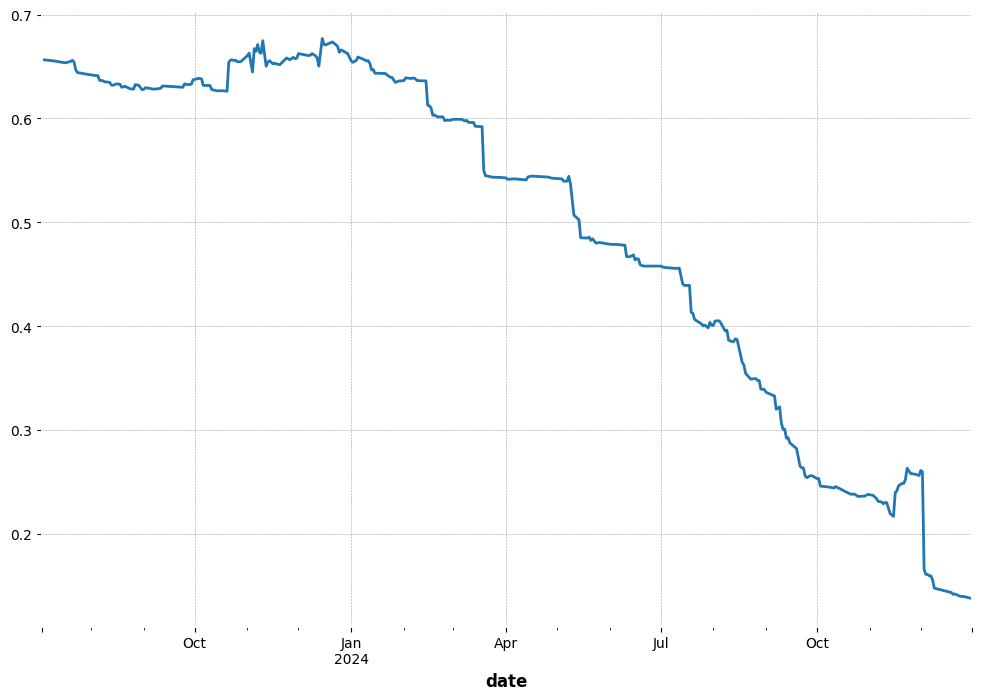

In [239]:
df_filled = pivoted_df.asfreq('D', method='ffill')
daily_changes= df_filled.pct_change()  
trx_returns = daily_changes['TRXUSD']    
vet_returns = daily_changes['VETUSD']    
window = int(len(df_filled.index)/2)    
df_corrs = trx_returns\
    .rolling(window=window, min_periods=window)\
    .corr(other=vet_returns)\
    .dropna()    
df_corrs.plot(figsize=(12,8));

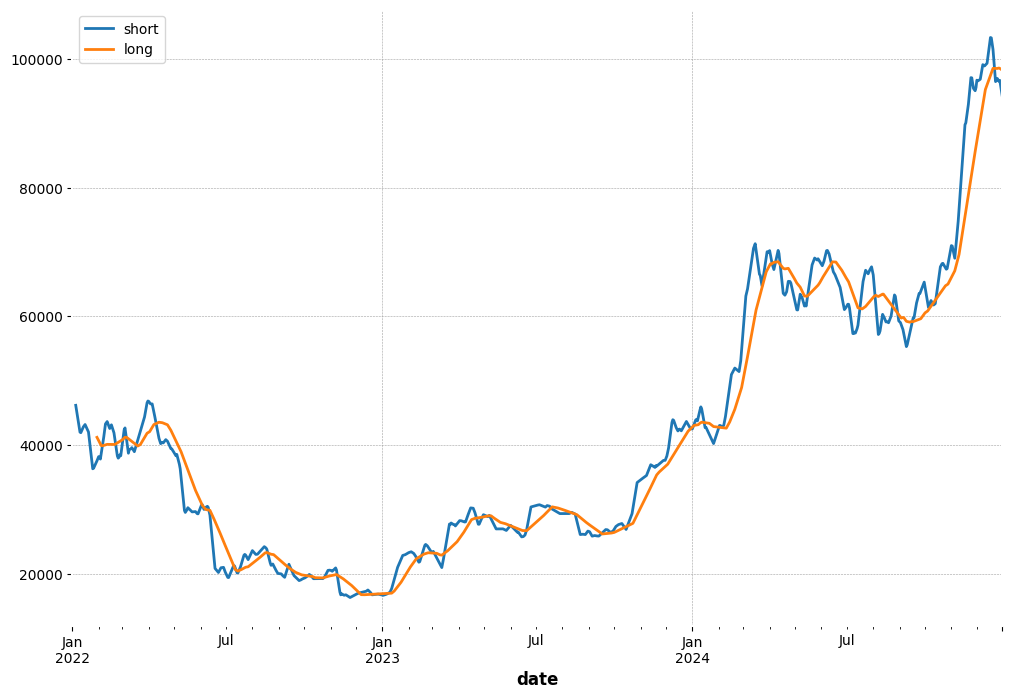

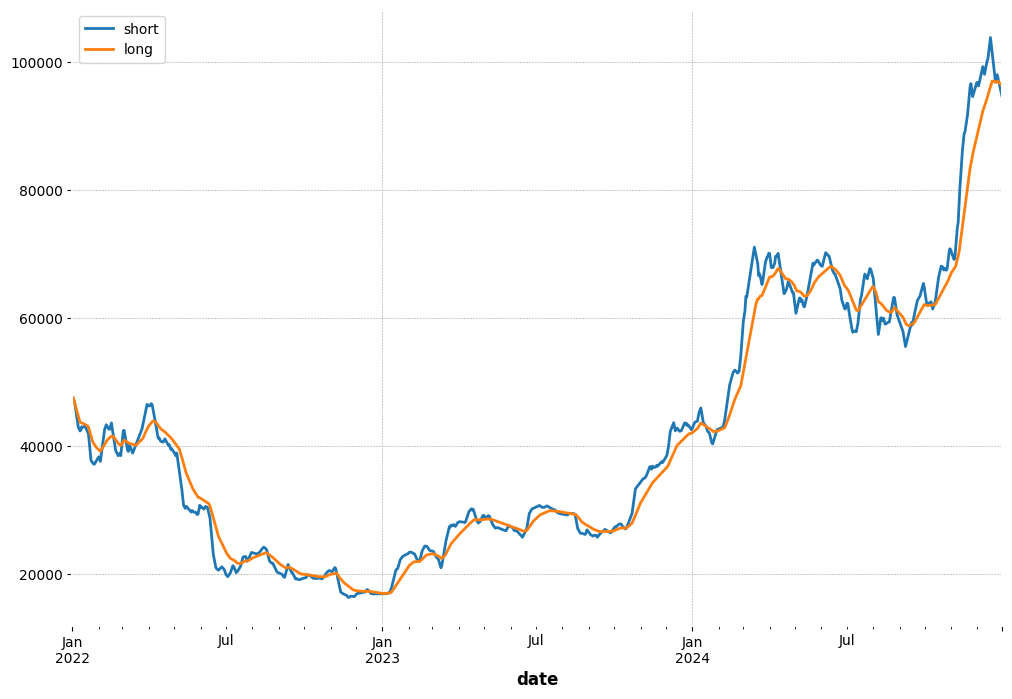

In [245]:
#Moving Average
df_filled = last_prices.asfreq('D', method='ffill')       
series_short = last_prices.rolling(window=5, min_periods=5).mean()    
series_long = last_prices.rolling(window=30, min_periods=30).mean()   
df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12, 8));
#Exponential Moving Average
series_short = last_prices.ewm(span=5).mean()    
series_long = last_prices.ewm(span=30).mean()    
df_sma = pd.DataFrame(columns=['short', 'long'])    
df_sma['short'] = series_short    
df_sma['long'] = series_long    
df_sma.plot(figsize=(12, 8));

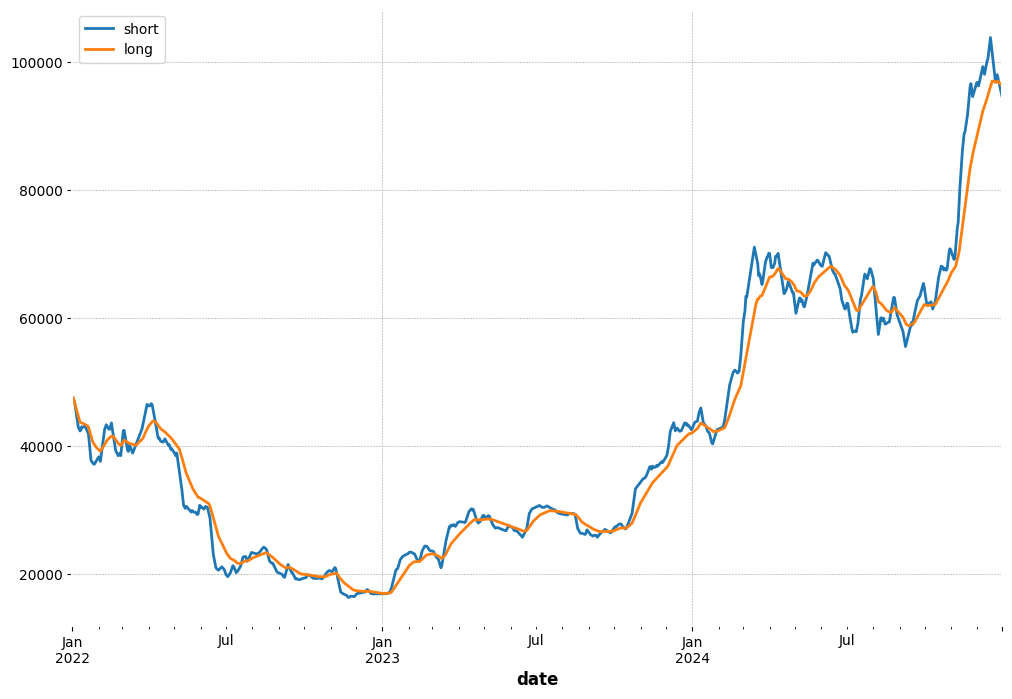